In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from scripts.config import Config
from scripts.model import Model

In [3]:
def poly_area(x, y):
    return 0.5 * np.abs(np.dot(x, np.roll(y, 1)) - np.dot(y, np.roll(x, 1)))


def group_area(group, layout):
    coordinates = [layout.get(node_id) for node_id in group]
    south = min(coordinates, key=lambda x: x[1])
    west = min(coordinates, key=lambda x: x[0])
    north = max(coordinates, key=lambda x: x[1])
    east = max(coordinates, key=lambda x: x[0])
    bbox = [south, west, north, east]
    return poly_area([n[0] for n in bbox], [n[1] for n in bbox])

In [4]:
config = Config()
model = Model(config)
edges, all_nodes = model.get_graph()
layout = {node.id: (float(node.lon), float(node.lat)) for node in all_nodes}

In [5]:
G = nx.Graph(edges)
sorted_groups = sorted(nx.connected_components(G), \
                       key=lambda g: group_area(g, layout), reverse=True)

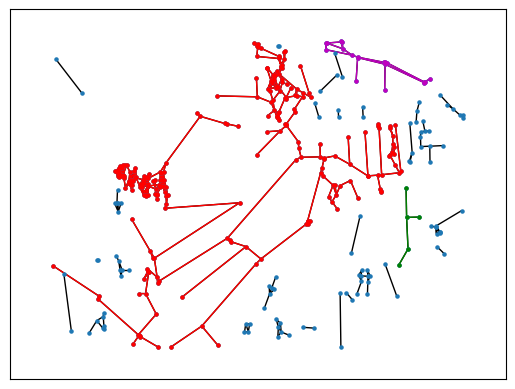

In [6]:
nx.draw_networkx(G, pos=layout, with_labels=False, node_size=5)
nx.draw_networkx(G.subgraph(list(sorted_groups[0])), pos=layout, node_color='r', edge_color='r', with_labels=False,
                 node_size=5)
nx.draw_networkx(G.subgraph(list(sorted_groups[1])), pos=layout, node_color='m', edge_color='m', with_labels=False,
                 node_size=5)
nx.draw_networkx(G.subgraph(list(sorted_groups[2])), pos=layout, node_color='g', edge_color='g', with_labels=False,
                 node_size=5)

In [11]:
for node_name in G.nodes:
    G.nodes[node_name]['pos'] = layout[node_name]

In [22]:
nx.geometric_edges(G, radius=0.0001)

[(3880540892, 3880540889),
 (3880540886, 5263568414),
 (5263568414, 5263568415),
 (5100533080, 5100533084),
 (3880541457, 3880541458),
 (3880541457, 3880541460),
 (4023394369, 294102574),
 (4023394369, 2052194192),
 (4023394369, 2052194194),
 (294102574, 2052194194),
 (506212792, 506212790),
 (8231041264, 8231041265),
 (8231041244, 8231041243),
 (2052194178, 4023473826),
 (3880541469, 3880540881),
 (1472505953, 1472506083),
 (1480990694, 4026463493),
 (3880541458, 3880541460),
 (4023784647, 487879926),
 (1682548329, 1682548363),
 (3880540911, 3880540909),
 (4066387654, 4066387653),
 (4066387654, 9680587820),
 (5030527037, 5030527038),
 (5100533087, 5100533091),
 (3927589238, 3927589240),
 (3927589238, 1641035527),
 (5100533064, 5100533091),
 (4033444743, 4033444742),
 (3927590114, 4383546974),
 (3927590114, 4383546973),
 (287211686, 4026463489),
 (1641146466, 1641146869),
 (4078133666, 29641660),
 (4078133666, 4078133665),
 (1478203126, 1478203193),
 (4383546974, 4383546973),
 (3927589

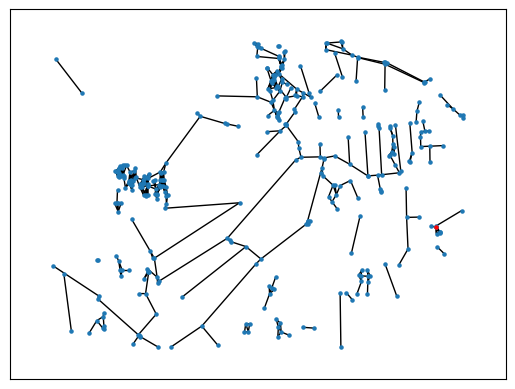

In [21]:
nx.draw_networkx(G, pos=layout, with_labels=False, node_size=5)
nx.draw_networkx(G.subgraph([3927589240]), pos=layout, with_labels=False, node_color='r', node_size=5)

In [ ]:
config_zero_threshold = Config(threshold=0)
model_zero = Model(config_zero_threshold)
edges, all_nodes = model_zero.get_graph()
layout = {node.id: (float(node.lon), float(node.lat)) for node in all_nodes}

In [ ]:
G = nx.Graph(edges)
sorted_groups = sorted(nx.connected_components(G), \
                       key=lambda g: group_area(g, layout), reverse=True)

In [ ]:
nx.draw_networkx(G, pos=layout, with_labels=False, node_size=5)
nx.draw_networkx(G.subgraph(list(sorted_groups[0])), pos=layout, node_color='r', edge_color='r', with_labels=False,
                 node_size=5)
nx.draw_networkx(G.subgraph(list(sorted_groups[1])), pos=layout, node_color='m', edge_color='m', with_labels=False,
                 node_size=5)
nx.draw_networkx(G.subgraph(list(sorted_groups[2])), pos=layout, node_color='g', edge_color='g', with_labels=False,
                 node_size=5)